<a href="https://colab.research.google.com/github/lukeharvison/luke-harvison/blob/main/EES_2110_Climate_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EES 2110 Intro to Climate Change Class: Google Colab Exercise 2

Welcome to Part 2 of the Climate Change Python Exercise!

In this Google Colab notebook, you will learn how to create maps using Cartopy and analyze real-world climate data. The exercises are designed to help you understand basic projections and perform near-surface air temperature analysis.

## Section 1: Basic Projections

In this section, you will learn how to create maps using [Cartopy](https://scitools.org.uk/cartopy/docs/latest/).

### Step 1: Install Cartopy

First, we need to install the Cartopy library if it is not already installed. Execute the following code block to install Cartopy and its dependencies:

```python
# Install Cartopy (if not already installed)
!apt-get -qq install python-cartopy python3-cartopy  # Install system dependencies
!pip install cartopy



In [1]:
# Install Cartopy (if not already installed)
!apt-get -qq install python-cartopy python3-cartopy  # Install system dependencies
!pip install cartopy


E: Unable to locate package python-cartopy
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 83.1 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


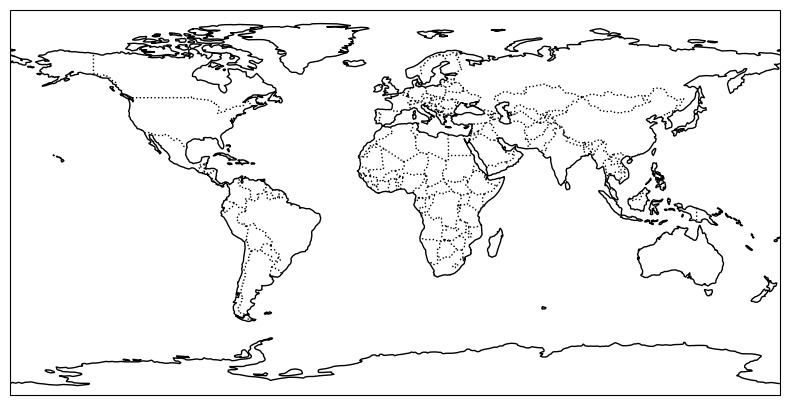

In [2]:
# prompt: ax.coastlines(resolution='110m')
# ax.add_feature(cfeature.BORDERS, linestyle=':')

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Create a figure and an axes object with a specific projection
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add coastlines and borders
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS, linestyle=':')


### Step 2: Create a Basic Map

Now, let's create a basic map using the Orthographic projection. This is a type of map projection that shows half of the globe as viewed from outer space.

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


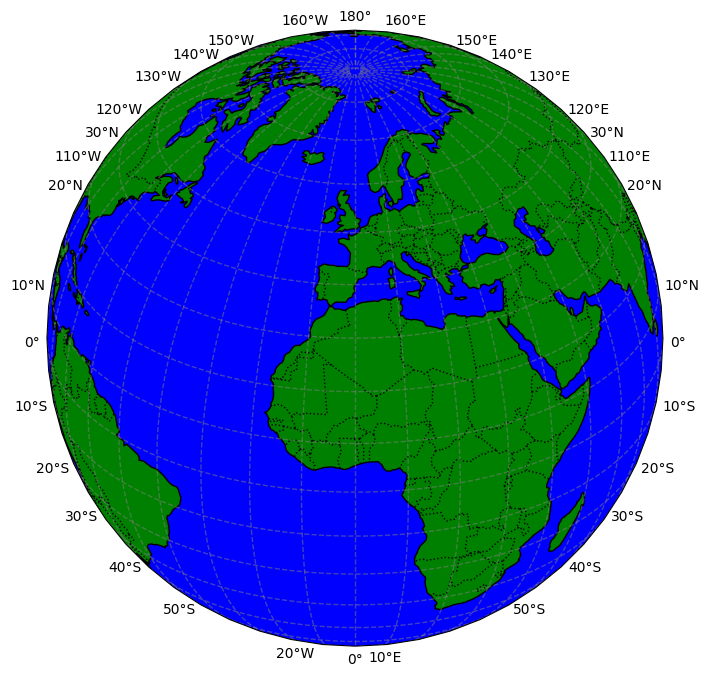

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a new figure with a Cartopy Orthographic projection
plt.figure(figsize=(10, 8))

# Set up the map with Orthographic projection centered at 0°N, 0°E
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0, central_latitude=30))

# Add coastlines and country borders with higher resolution
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Add a finer grid (every 10 degrees)
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = plt.MultipleLocator(10)
gl.ylocator = plt.MultipleLocator(10)

# Mask the land with a light gray color
ax.add_feature(cfeature.LAND, facecolor='green')
# Add ocean with a light blue color
ax.add_feature(cfeature.OCEAN, facecolor='blue')

# Set the title and show the plot
# plt.title('Planet Earth with Fine Grid and Masked Land (Orthographic Projection)')
plt.show()


### Exercise 1

Try modifying the map such that the land is shown in a different color (e.g., green) and the ocean is shown in ligh blue. Uncomment the line that adds the ocean feature and modify the colors as needed.

In [4]:
# Your code for Exercise 1
ax.add_feature(cfeature.LAND, facecolor='green')


## Section 2: Real-World Data Analysis

In this section, you will download and analysis near-surface air temperature data.

### Step 1: Download climate data

We will download near-surface (2-m) air temperature data from [NCEP/DOE Reanalysis II](https://psl.noaa.gov/data/gridded/data.ncep.reanalysis2.html). Run the following command to download the data file:


In [6]:
# Download the cliamte data
!curl -O -C - https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis2/Monthlies/gaussian_grid/air.2m.mon.mean.nc


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.7M  100 19.7M    0     0  9548k      0  0:00:02  0:00:02 --:--:-- 9549k


### Step 2: Read Climate Data

Use [xarray](https://xarray.dev/) to read the downloaded climate data. This dataset contains monthly mean near-surface air temperature values.



In [7]:
import xarray as xr

# File name
file_name = "air.2m.mon.mean.nc"

# Read the data
t2_dat = xr.open_dataset(file_name)
# Reverse the latitude array to ensure that the data is correctly oriented.
t2_dat = t2_dat.isel(lat=slice(None, None, -1))
t2_dat

<xarray.Dataset> Size: 40MB
Dimensions:    (level: 1, lat: 94, lon: 192, time: 553, nbnds: 2)
Coordinates:
  * level      (level) float32 4B 2.0
  * lat        (lat) float32 376B -88.54 -86.65 -84.75 ... 84.75 86.65 88.54
  * lon        (lon) float32 768B 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
  * time       (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2025-01-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] 9kB ...
    air        (time, level, lat, lon) float32 40MB ...
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    source_url:     http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history:        created 2002/03 by Hoop (netCDF2.3)\nConverted to chunked...

### Step 3: Extract Climate Data

Next, we will extract the temperature data (air_dat) for a specific time period (1980-2023).

Compute the mean annual temperature across this period.

In [8]:
# Extract latitude and longitude
lat = t2_dat.lat
lon = t2_dat.lon

# Extract air temperature data
air_dat = t2_dat.air

# Subset data for the time period 1980-2023
air_dat_subset = air_dat.where((air_dat['time.year'] >= 1980) & (air_dat['time.year'] <= 2023), drop=True)

# Calculate the annual mean temperature
air_mean = air_dat_subset.mean({'time','level'})
air_mean

<xarray.DataArray 'air' (lat: 94, lon: 192)> Size: 72kB
array([[230.49625, 230.34691, 230.19702, ..., 230.94403, 230.79529,
        230.64584],
       [232.22351, 231.86382, 231.50763, ..., 233.32138, 232.9538 ,
        232.58746],
       [233.17401, 232.62833, 232.09613, ..., 234.89215, 234.30676,
        233.73418],
       ...,
       [258.00693, 258.12994, 258.23184, ..., 257.74567, 257.81906,
        257.91528],
       [257.84274, 257.9023 , 257.94476, ..., 257.7488 , 257.78058,
        257.81882],
       [257.62802, 257.7101 , 257.7006 , ..., 257.65894, 257.66742,
        257.6297 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 376B -88.54 -86.65 -84.75 ... 84.75 86.65 88.54
  * lon      (lon) float32 768B 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1

### Step 4: Visualize the Climate Data

Use Cartopy to plot the mean annual temperature on a global map with a Robinson projection.

Add cyclic points to the data for seamless plotting.

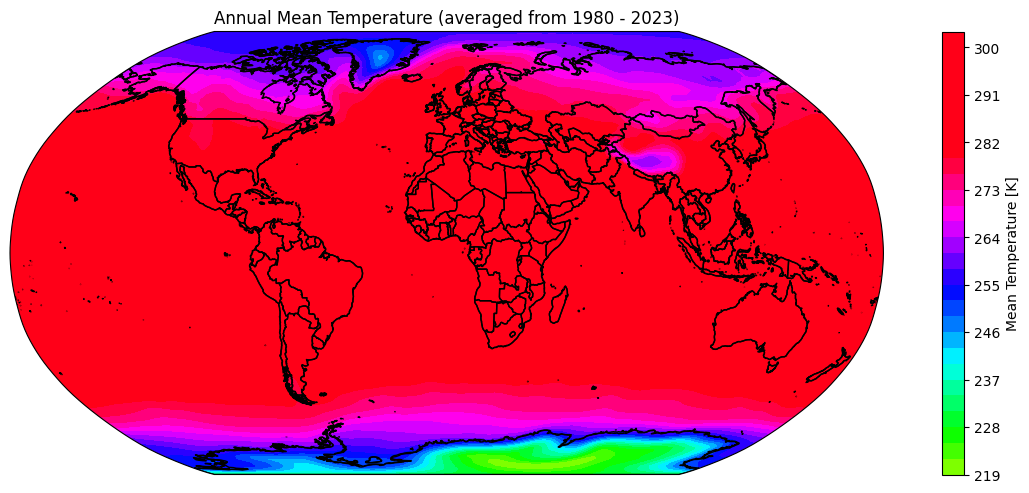

In [15]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.util as cutil
from cartopy.feature import NaturalEarthFeature

# Adding cyclic data to handle wrapping around 360 degrees
cdata, clon = cutil.add_cyclic_point(air_mean, coord=lon)
clat = lat
vmin = 200
vmax = 280

# Create a figure with a Robinson projection map
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# Set the global extent of the map
ax.set_global()

# Plot the data
cb = ax.contourf(clon, clat, cdata,
                 levels=30,
                 vmin=vmin,
                 vmax=vmax,
                 transform=ccrs.PlateCarree(),
                 cmap='hsv')

# Add color bar
cbar = plt.colorbar(cb, ax=ax, orientation='vertical')
cbar.set_label('Mean Temperature [K]')

# Add coastlines and country borders
ax.coastlines()
ax.add_feature(NaturalEarthFeature(category='cultural', name='admin_0_countries',
                                   scale='50m', facecolor='none', edgecolor='black'))

# Set the title of the map
plt.title('Annual Mean Temperature (averaged from 1980 - 2023)')

# Tight layout to adjust spacing
plt.tight_layout()

# Display the plot
plt.show()

### **Questions:**

1. **Latitude Reversal:**
   - What is the purpose of reversing the latitude array? Explain why this step is crucial for accurate data visualization.

2. **Temperature Range:**
   - Modify the `vmin` and `vmax` values in the plotting code. Describe how adjusting these values impacts the visual representation of the temperature data.

3. **Map Projections:**
   - Experiment with different map projections using the `ccrs` module (e.g., `ccrs.Mollweide()`, `ccrs.PlateCarree()`). How does each projection alter the appearance and interpretation of the map?

4. **Color Maps:**
   - Change the `cmap` argument in `ax.contourf` to various colormaps (e.g., `'viridis'`, `'coolwarm'`). Which colormap do you think most effectively represents the data, and why?

### **Discussion Topics:**

1. **Regional Temperature Distribution:**
   - How does the mean annual temperature vary across different regions of the globe? What patterns or trends do you observe?

2. **Factors Influencing Temperature:**
   - Identify and discuss potential factors that could influence variations in temperature patterns across the globe.

3. **Future Climate Scenarios:**
   - How might the observed temperature patterns evolve under future climate scenarios? What changes might we expect?

### **Task:**

- **Choose two** of the questions above to answer.
- **Select one** of the discussion topics to lead a class discussion.


1. Temperature Range

First, I modified vmin and vmax both to smaller numbers. This caused the overall temperature across the globe to increase. When modified around 20 degrees, this change was very significant. Visually, this temperature increase is reflected by the red color.

Next, I modified vmin and vmax both to higher numbers.This caused the temperature to decrease. This was visually reflected by cooler hues such as blue and green.

Then, I modified vmin down and vmax up. This seemed to increase the range of temperatuer across the U.S. Across the center of the picture, the color shown was a vibrant pink, indicating a relatively high temperature. However, at the top and bottom, the color was blue, incidadting a cold temperature. Similarly, modifying vmin down but keeping vmax the same caused the temperature difference, albeit less distributed; however, the center of the earth was hotter.

Finally, I modified vmin up and vmax down.

2.